In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

print(sys.version_info)
for module in mpl,np,sklearn,torch:
    print(module.__name__,module.__version__)

device=torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

sys.version_info(major=3, minor=9, micro=18, releaselevel='final', serial=0)
matplotlib 3.6.0
numpy 1.23.3
sklearn 1.3.1
torch 1.12.1+cu102
cuda:0


In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_ds=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_ds=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [35:11<00:00, 12511.96it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 97504.00it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [02:13<00:00, 33049.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 33757.13it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw


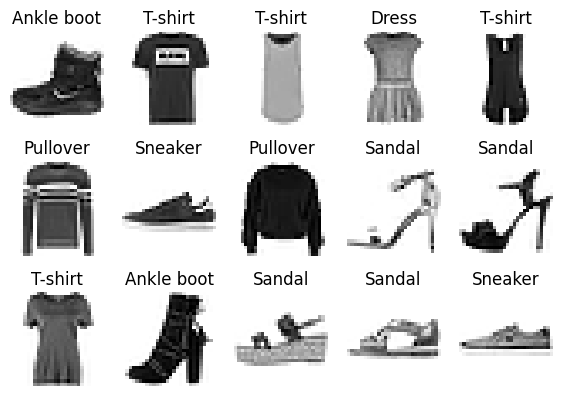

In [7]:
# 在 PyTorch 中，图像数据的默认表示方式是 (channels, height, width)，其中 channels 表示图像的通道数，height 表示图像的高度，width 表示图像的宽度。而在 TensorFlow 中，图像数据的默认表示方式是 (height, width, channels)。
# np.transpose(img_arr, (1, 2, 0)) 的作用是将图像数据的维度从 PyTorch 的表示方式转换为 TensorFlow 的表示方式，以便在 NumPy 中正确地显示图像。
def show_imgs(n_rows,n_cols,train_ds,class_names):
    assert n_rows*n_cols<len(train_ds)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            img_arr,label=train_ds[index]
            img_arr=np.transpose(img_arr,(1,2,0))
            plt.imshow(img_arr,cmap="binary",interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[label])
    plt.show()


class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
#只是打印了前15个样本
show_imgs(3, 5, train_ds, class_names)

In [8]:
train_loader=torch.utils.data.DataLoader(train_ds,batch_size=32,shuffle=True)
val_loader=torch.utils.data.DataLoader(test_ds,batch_size=32,shuffle=False)


In [9]:
# forward 方法则定义了数据在模型中的前向传播过程。
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28,300),
            nn.ReLU(),
            nn.Linear(300,100),
            nn.ReLU(),
            nn.Linear(100,10),
        )

    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork()

In [10]:
model


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)